### Uploading Files to S3

1. Ensure your boto3 session is established and working
2. Required files are in the source folder

In [1]:
#import the libraries, if not installed then pip install them
import boto3
import awswrangler as wr
import pandas as pd
import configparser
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the credentials securely.
credents = configparser.ConfigParser()

In [3]:
#use read_file method
credents.read_file(open('credentials.config'))

In [4]:
#Reading in the credentials into Python variables. No can see them
aws_key = credents["AWS"]["KEY"]
aws_secret = credents["AWS"]["SECRET"]
region = credents["AWS"]["REGION"]

In [5]:
#Creating the Session
your_session = boto3.Session(aws_access_key_id=aws_key,
                            aws_secret_access_key=aws_secret,
                            region_name=region)

In [6]:
#create variable with destination bucket path
desination = 's3://destination-folder'

In [7]:
#Uploading source_folder/top_earners_list.csv 
!ls source_folder/

top_earners_list.csv  top_earners_list.txt  top_earners_list.xlsx


### Using wr.s3.upload() method

In [14]:
wr.s3.upload(local_file='source_folder/top_earners_list.csv',
             path=desination + '/top_earners_list.csv',
            boto3_session=your_session)

In [13]:
wr.s3.upload(local_file='source_folder/top_earners_list.txt',
             path=desination + '/top_earners_list.txt',
            boto3_session=your_session)

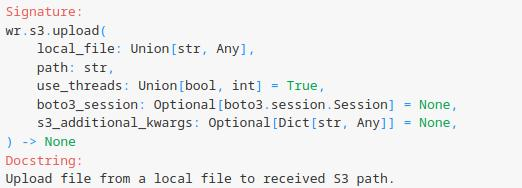

### Verifying the file has uploaded successfully using list_objects()

In [10]:
wr.s3.list_objects(path=desination,boto3_session=your_session)

['s3://destination-folder/parquet/c6ac3a715a46438aaab26878caed4c60.snappy.parquet',
 's3://destination-folder/parquet/write_top_earners.parquet/d81a1081c3a941d09b2098257caa2112.csv',
 's3://destination-folder/top_earners_list.txt']

### Using wr.s3.dowload() method

In [13]:
#the above file will be downloaded to local_destination folder in path
wr.s3.download(path=desination + '/top_earners_list.csv',
              local_file='local_destination/downloaded_earners.csv',
              boto3_session=your_session)

In [15]:
!cat local_destination/downloaded_earners.csv

id,name,E-mail,Salary,occupation
1,Joel,Joel@Athena.com,187069,Mathematician
2,Afro,Afro@Glue.aws.in,752689,Physicist
3,Beatles,beatles@lambda.com,975682,Algorist
4,Snoop Dog,snoopy@apigateway.com,752689,Artificial Rapper


In [12]:
#clean up
wr.s3.delete_objects(path=desination,boto3_session=your_session)
wr.s3.list_objects(path=desination,boto3_session=your_session)

[]